# Secrets of Vinho Verde

This week we will use the power of the **scikit-learn** library to establish which **factors** contribute to a great glass of red wine.

1599 wines were tested by at least 3 wine experts and given a quality grade from **0** (terrible) to **10** (excellent).

There were **11 factors** measured: *fixed acidity*, *volatile acidity*, *citric acid*, *residual sugar*, *chlorides*, *free and total sulphur dioxide*, *density*, *pH*, *sulphates* and *alcohol*.

In [ ]:
import pandas as pd

# Load in the red wine data from the UCI ML website.
df_redwine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')

In [ ]:
# Take a look
print(df_redwine.head(10))
# Data dimensionality (rows, colums)
print(df_redwine.shape)
# Data distributing
df_redwine.info()

## Task

In this task, you have to:
1. Split the set in training and testing sets (80-20).
2. Apply the following regression methods:
  * Decision Tree Regressor (DTR)
  * Linear Regression
  * Logistic Regression

3. Evaluate the quality of each model by computing:
  * Confusion matrix
  * ROC
  * Cross-validation score

4. Repeat steps 2) and 3) but restricting the regression of the quality score to attributes:
  * alcohol
  * density 
  * fixed acidity
  * ph 

**Question:**
Which model/configuration performs better predictions?


In [143]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score

In [144]:
train, test = train_test_split(df_redwine, train_size=0.8)

In [145]:
X_train = train.drop(["quality"], axis=1)
y_train = train["quality"]
X_test = test.drop(["quality"], axis=1)
y_test = test["quality"]

## Decision Tree Regressor

In [154]:
clf = DecisionTreeRegressor().fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

In [155]:
class DecisionTreeRegressorWrapper(DecisionTreeRegressor):
  def predict(self, X):
    # Call to DecisionTreeRegressor "predict"
    temp = super().predict(X)
    # Rounding numbers
    return np.rint(temp).astype(int)

In [156]:
clf_wr = DecisionTreeRegressorWrapper().fit(X_train, y_train)
y_test_pred = clf_wr.predict(X_test)

### Confusion Matrix

<AxesSubplot:>

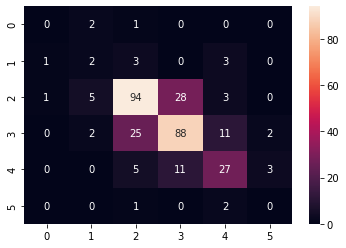

In [157]:
cf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf_matrix, annot=True)

### ROC Curve (Multiclass)

In [158]:
X = df_redwine.drop(["quality"], axis=1) # attributes: ph, alcohol, etc
# Binarize the output
y = df_redwine["quality"]
y_binary = label_binarize(y, classes=[3, 4, 5, 6, 7, 8])
n_classes = y_binary.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2)

In [159]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(DecisionTreeRegressorWrapper())
classifier.fit(X_train, y_train)
y_score = classifier.predict(X_test)

In [160]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

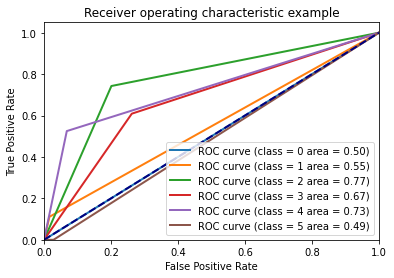

In [161]:
plt.figure()
lw = 2

for i in range(n_classes):
	plt.plot(fpr[i], tpr[i], lw=lw, label="ROC curve (class = {0} area = {1:0.2f})".format(i, roc_auc[i]))
  
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### Cross-validation score

In [162]:
lrw = DecisionTreeRegressorWrapper()
scores = cross_val_score(lrw, X, y, cv=5)
print("{0:0.2f} accuracy with a standard deviation of {1:0.2f}".format(scores.mean(), scores.std()))

-0.35 accuracy with a standard deviation of 0.09


## Linear Regression

In [146]:
clf = LinearRegression().fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

In [147]:
class LinearRegressionWrapper(LinearRegression):
  def predict(self, X):
    # Call to LinearRegression "predict"
    temp = super().predict(X)
    # Rounding numbers
    return np.rint(temp).astype(int)

In [148]:
clf_wr = LinearRegressionWrapper().fit(X_train, y_train)
y_test_pred = clf_wr.predict(X_test)

### Confusion Matrix

<AxesSubplot:>

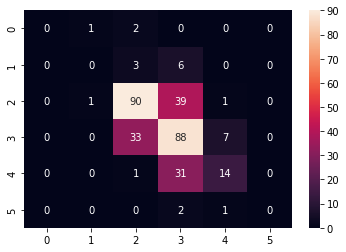

In [149]:
cf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf_matrix, annot=True)

### ROC Curve (Multiclass)

In [163]:
X = df_redwine.drop(["quality"], axis=1) # attributes: ph, alcohol, etc
# Binarize the output
y = df_redwine["quality"]
y_binary = label_binarize(y, classes=[3, 4, 5, 6, 7, 8])
n_classes = y_binary.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2)

In [164]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(LinearRegressionWrapper())
classifier.fit(X_train, y_train)
y_score = classifier.predict(X_test)

In [165]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

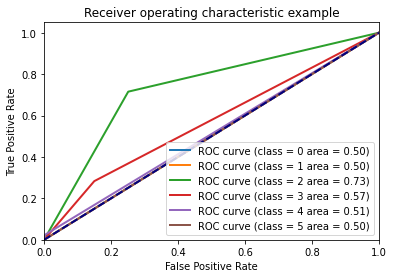

In [166]:
plt.figure()
lw = 2

for i in range(n_classes):
	plt.plot(fpr[i], tpr[i], lw=lw, label="ROC curve (class = {0} area = {1:0.2f})".format(i, roc_auc[i]))
  
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### Cross-validation score

In [167]:
lrw = LinearRegressionWrapper()
scores = cross_val_score(lrw, X, y, cv=5)
print("{0:0.2f} accuracy with a standard deviation of {1:0.2f}".format(scores.mean(), scores.std()))

0.16 accuracy with a standard deviation of 0.09


## Logistic Regression

In [150]:
clf = LogisticRegression(solver='lbfgs',max_iter=1200000).fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

In [151]:
class LogisticRegressionWrapper(LogisticRegression):
  def predict(self, X):
    # Call to LogisticRegression "predict"
    temp = super().predict(X)
    # Rounding numbers
    return np.rint(temp).astype(int)

In [152]:
clf_wr = LogisticRegressionWrapper().fit(X, y)
y_test_pred = clf_wr.predict(X_test)

/home/markel/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Confusion Matrix

<AxesSubplot:>

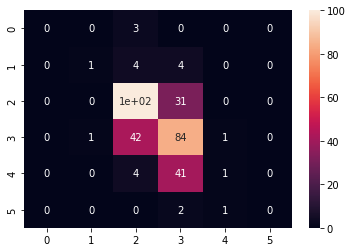

In [153]:
cf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf_matrix, annot=True)

### ROC Curve (Multiclass)

In [168]:
X = df_redwine.drop(["quality"], axis=1) # attributes: ph, alcohol, etc
# Binarize the output
y = df_redwine["quality"]
y_binary = label_binarize(y, classes=[3, 4, 5, 6, 7, 8])
n_classes = y_binary.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2)

In [169]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(LogisticRegressionWrapper())
classifier.fit(X_train, y_train)
y_score = classifier.predict(X_test)

/home/markel/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/markel/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [170]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

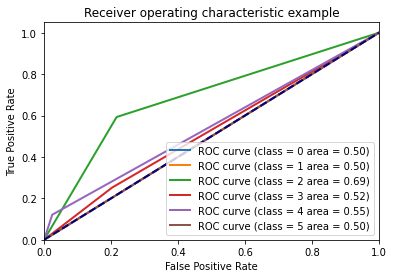

In [171]:
plt.figure()
lw = 2

for i in range(n_classes):
	plt.plot(fpr[i], tpr[i], lw=lw, label="ROC curve (class = {0} area = {1:0.2f})".format(i, roc_auc[i]))
  
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### Cross-validation score

In [172]:
lrw = LogisticRegressionWrapper()
scores = cross_val_score(lrw, X, y, cv=5)
print("{0:0.2f} accuracy with a standard deviation of {1:0.2f}".format(scores.mean(), scores.std()))

/home/markel/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/markel/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

0.57 accuracy with a standard deviation of 0.03
